In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model

Using TensorFlow backend.


In [2]:
# 1차3원 방정식을 NN으로 근사화(approximation) 하고자 하는 것임.
# y = w * x + b 함수
# 아래의 W, B를 NN이 찾아내는지 확인하고자 함.
def myfunc(X):
  ''' X는 3차원 데이타라고 가정. len()이 3인 리스트여야 한다.'''  
  W = [1.3, 5.5, 2.7] 
  B = [2.6, -1.2, 3.5] 
  Y = [x*w + b + random.random()*0.1 for x, w, b in zip(X, W, B) ]
  return Y

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 100          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xlist = [[random.random() * XVALUE for j in range(3)]  for i in range(NUM_DATA)]
xlist.sort()            # sorting
ylist = [myfunc(x) for x in xlist]
print('x, y', xlist[0], ylist[0])


x, y [0.015552699250614976, 1.1228898316267393, 4.135786604899383] [2.716685614784132, 5.042748828429771, 14.76421673267591]


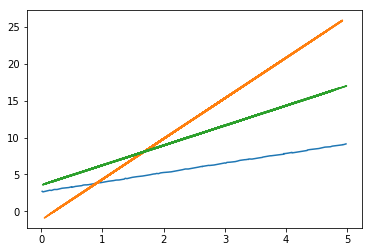

In [4]:
# actual data 산점도
fig, ax = plt.subplots()
ax.plot(xlist, ylist, label='actual')
plt.show()

In [5]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xlist = np.array(xlist)
ylist = np.array(ylist)
print('xlist.shape :',xlist.shape)  # shape ==  (10,)
print('ylist.shape :',ylist.shape)  # shape ==  (10,)

xlist.shape : (100, 3)
ylist.shape : (100, 3)


In [6]:
# keras
inputs = Input(shape=(3,))
# activation -> https://keras.io/activations/
outputs = Dense(3, activation='linear')(inputs)
# keras 모델 구성하기
model = Model(inputs=inputs, outputs=outputs)
# 모델 학습과정 설정하기
# optimizer -> https://keras.io/optimizers/
# loss      -> https://keras.io/losses/
model.compile(optimizer='adam', loss='mean_squared_error')
# model 학습
hist = model.fit(xlist, ylist, epochs=100)
# model 예상
predict = model.predict(xlist)

Epoch 1/100
100/100 [==============================] - 0s - loss: 100.9773     
Epoch 2/100
100/100 [==============================] - 0s - loss: 100.3969     
Epoch 3/100
100/100 [==============================] - 0s - loss: 99.7829     
Epoch 4/100
100/100 [==============================] - 0s - loss: 99.2028      
Epoch 5/100
100/100 [==============================] - 0s - loss: 98.6090      
Epoch 6/100
100/100 [==============================] - 0s - loss: 98.0155     
Epoch 7/100
100/100 [==============================] - 0s - loss: 97.4447      
Epoch 8/100
100/100 [==============================] - 0s - loss: 96.8581     
Epoch 9/100
100/100 [==============================] - 0s - loss: 96.2883      
Epoch 10/100
100/100 [==============================] - 0s - loss: 95.7259      
Epoch 11/100
100/100 [==============================] - 0s - loss: 95.1586     
Epoch 12/100
100/100 [==============================] - 0s - loss: 94.5911     
Epoch 13/100
100/100 [====================

In [7]:
print(predict)

[[  1.53595853   6.78458834   0.92481291]
 [  3.033252    10.29149628  -0.62660658]
 [  2.57908058   8.63562202  -0.15844059]
 [  2.5233016    5.90939045  -1.33371508]
 [  2.51148534   7.85896969  -0.2454344 ]
 [  1.36283469   2.84709811  -0.04723769]
 [  3.3546977   10.89214706  -0.32664794]
 [  1.56818295   6.50759649   1.48648894]
 [  1.94252431   3.92783213  -0.40208244]
 [  2.22172117   5.97580528   0.35293943]
 [  3.75925922  12.08743858   0.10606253]
 [  2.88389277   6.78146267  -0.58241904]
 [  2.56052327   6.84497261   0.18239033]
 [  2.69304228   9.02809811   0.98630011]
 [  0.98283768   0.60269219   0.76003003]
 [  1.7753315    5.39979219   1.47812104]
 [  3.18844318   9.00116253   0.36328495]
 [  2.31421614   4.95851517   0.36116549]
 [  3.87450004  11.5980835    0.29966521]
 [  2.24750137   6.23067951   1.3000946 ]
 [  2.95498276   8.99046135   1.21436834]
 [  2.63316298   5.34322166   0.42358065]
 [  3.33896875   6.80544281  -0.399472  ]
 [  2.44350147   6.20375776   1.50